In [69]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

mnist = datasets.load_digits()

In [9]:
X, y = mnist['data'], mnist['target']

In [20]:
print(X.shape, y.shape)
print(X[0])

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


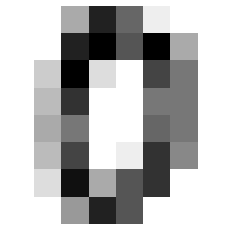

In [55]:
first_image = X[0]
first_image = first_image.reshape(8,8)

plt.imshow(first_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [53]:
y_train_5 = (y_train == 5)
y_train_5

array([False, False,  True, ..., False, False, False])

In [58]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
sgd_clf.predict([X_train[2]])

array([ True])

In [67]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [68]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9895833333333334
0.9895615866388309
0.9895397489539749


In [70]:
# Or.

In [ ]:
sgd_clf_2 = SGDClassifier(random_state=42)

In [ ]:
scores = cross_val_score(sgd_clf_2, X_train, y_train_5, cv=3, scoring'accuracy)